### 행렬의 미분

In [1]:
import sympy
import scipy as sp

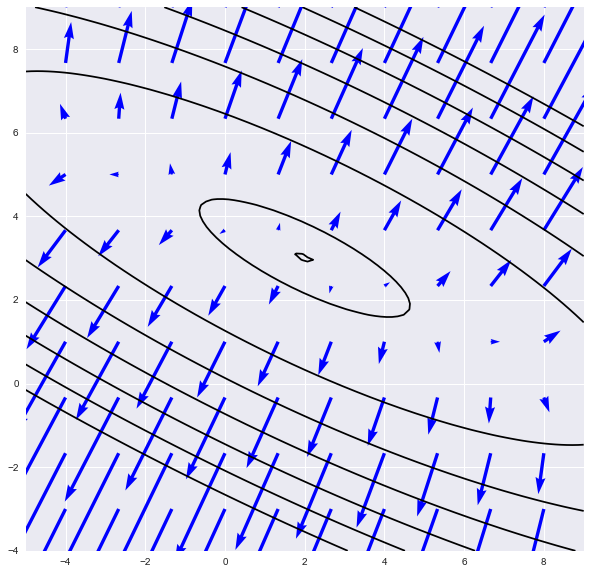

In [2]:
### 그레디언트 벡서 함수 그리기 - 컨투어 플롯 /퀴버 플롯 
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)


def gx(x,y):
    return 4 * x + 6 * y -26
def gy(x,y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400)
plt.show()

### 최적화 기초

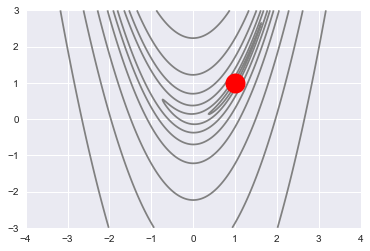

In [3]:
### 2차원 Rosenbrock 함수

def f2(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

In [4]:
### SGD 그래프 그려보기

In [5]:
def f1(x):
    return (x - 2) ** 2 + 2

In [6]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2)

x = 0, g = -4
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014


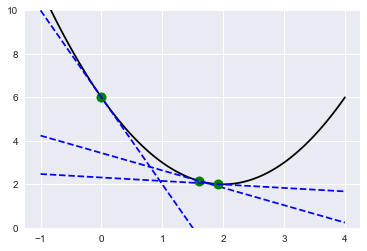

In [7]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx-x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
plt.ylim(0, 10)
plt.show()

In [8]:
### SGD함수 최적점 찾기 : x = -2, y = -2에서 시작하여 최적점 찾기

In [9]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

def fd2(x,y):
    return np.array((2 * (x-1) - 400 * x * (y - x**2), 200 * (y - x**2)))

In [10]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15,50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e -4
s = 0.9    # for arrower head drawing

# k = 0
x = -2
y = -2
g = f2g(x, y)
print("x = {}, g = {}".format((x, y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, head_length=0.2, fc='k', ec = 'k', lw=2)


# k = 1
x = x - mu * g[0]  #<-- 왜 g[0]?
y = y - mu * g[1]  #<-- 왜 g[1]?
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k', lw=2)

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k', lw=2)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-8dd7c935c768>, line 10)

In [ ]:
### SciPy 를 이용한 최적화 

In [11]:
import scipy as sp

In [12]:
### 단일변수 함수의 최적화

def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


In [13]:
#<- nit와 nfev차이를 줄여서 연산을 덜하게 하려면, 직접 jac을 구해서 넣어준다.

def f1p(x):
    return 2 * (x-2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.])


In [ ]:
### 단일변수 함수의 최적화 <-기존 함수의 여러 변수들을 벡터의 인수로 바꿔 넣어준다.

In [14]:
def f2(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 1.2197702024999478e-11
 hess_inv: array([[ 0.50957143,  1.01994476],
       [ 1.01994476,  2.04656074]])
      jac: array([  9.66714798e-05,  -4.64005023e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 496
      nit: 57
     njev: 121
   status: 2
  success: False
        x: array([ 0.99999746,  0.99999468])


In [ ]:
### 연습문제1 - 다변수함수의 최적화 : jac인수로 속도 향상시키기

In [15]:
def f2p(x):
    return np.array([2 * (x[0]-1) - 400 * x[0] * (x[1] - x[0]**2), 200 * (x[1] - x[0]**2)])

result = sp.optimize.minimize(f2, x0, jac=f2p)
print(result)

      fun: 1.1490356198637715e-16
 hess_inv: array([[ 0.49933682,  0.99872978],
       [ 0.99872978,  2.00252814]])
      jac: array([  4.29304940e-07,  -2.14157247e-07])
  message: 'Optimization terminated successfully.'
     nfev: 73
      nit: 56
     njev: 73
   status: 0
  success: True
        x: array([ 1.,  1.])


##### 제한조건이 있는 최적화 문제

In [16]:
# objective function f(x) = x1^2 + x2^2

def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1   #####<- 왜재?

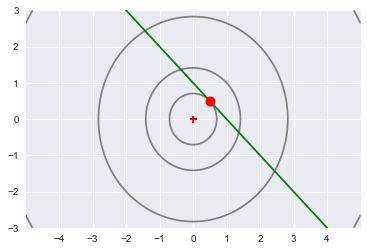

In [17]:
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.show()

In [21]:
### Scipy optimize - fmin_slsqp 명령

def f3(x):
    return x[0] + x[1]
def eq_constraint(x):
    return x[0]**2 + x[1]**2 - 1
sp.optimize.fmin_slsqp(f3, np.array([0, 0]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4142137537318966
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


array([ 0.70710688,  0.70710688])

In [ ]:
### 부등식 제한 조건이 있는 최적화 문제

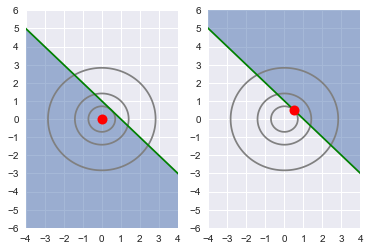

In [23]:
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-6, 6, 13))

ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-6, 6, 13))

plt.show()

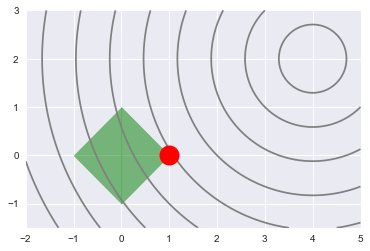

In [27]:
### 복수의 부등식 제한 조건이 있는 2차원 최적화 문제

def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray", levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

ax = plt.gca()
x12 = np.linspace(-1, 0, 10)
x13 = np.linspace(0, 1, 10)
ax.fill_between(x12, x12 + 1, -1 - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - 1, 1 - x13, color='g', alpha=0.5)

plt.plot(1, 0, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.show()

In [ ]:
### 왜 원의 식에 sqrt를 해주는거지?